# Reconhecimento de voz por redes neurais (Machine Learning)

Este projeto foi desenvolvido com o intuito de, através do aprendizado de maquina, reconhecer os digitos de 0 a 9 através de sua sonoridade. Para isso, foram colhidas amostras sonoras de quatro pessoas distintas, cada um repetindo a sequencia de 0 a 9, individualmente para casa numero, cinquenta veses, portanto teremos um dataset de 2000 arquivos de audios, com o dataset em mãos, o submetemos ao treinamento de redes neurais atráves do tensorflow fornecido pela biblioteca do Keras. Após o treinamento da rede, é feita a comparação com as amostras de som de teste passando pela função de predição determinando o numero correspondente.

Abaixo, é possível executar o código através das celulás de codigo do Jupyter Notebook, facilitando a visualização da aplicação como um todo.

Informações de audio:   

                        - Chroma stft
                        - Rmse
                        - Spectral Centroid
                        - Spectral Bandwidth
                        - Spectral RollOff
                        - Zero Crossing Rate
                        - Mfcc

Este bloco de código está dividido em 3 seções:
1. Extração de todas as informação dos arquivos de audio e salva-las em um arquivo CSV para leitura posterior.
2. Treinamento do dataset recolhido de quatro participantes.

## Seção 1

Nesta seção obteremos o resultado dos arquivos em csv para a utilização na modelação da rede neural.

```
trainData     : ../data/recordings/train 
testData      : ../data/recordings/test
```


In [1]:
# Quando verdadeiro, os arquivos de audio serão lidos e suas informações serão armazenadas em um arquivo CSV
CREATE_CSV_FILES = True

In [2]:
# Definindo os nomes dos arquivos de CSV
TRAIN_CSV_FILE = "train.csv"
TEST_CSV_FILE = "test.csv"
# MORE_TRAIN_CSV_FILE = "more_train.csv"
# MORE_TEST_CSV_FILE = "more_test.csv"


In [3]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
import librosa
import librosa.display
import csv
import os

def extractWavFeatures(soundFilesFolder, csvFileName):
    print("As informações dos arquivos de audio da pasta "+soundFilesFolder+" serão salvas no arquivo "+csvFileName)
    header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
    for i in range(1, 21):
        header += f' mfcc{i}'
    header += ' label'
    header = header.split()
    print('Cabeçalho do CSV: ', header)
    file = open(csvFileName, 'w', newline='')
    writer = csv.writer(file)
    writer.writerow(header)
    genres = '1 2 3 4 5 6 7 8 9 0'.split()
    for filename in os.listdir(soundFilesFolder):
        number = f'{soundFilesFolder}/{filename}'
        y, sr = librosa.load(number, mono=True, duration=30)
        y, index = librosa.effects.trim(y)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        rmse = librosa.feature.rms(y=y)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        writer.writerow(to_append.split())
    file.close()
    print("Fim da função de extração de dados")

if (CREATE_CSV_FILES == True):
    extractWavFeatures("../data/recordings/train", TRAIN_CSV_FILE)
    extractWavFeatures("../data/recordings/test", TEST_CSV_FILE)
    # extractWavFeatures("../data/recordings/moreSpeakersTrain", MORE_TRAIN_CSV_FILE)
    # extractWavFeatures("../data/recordings/moreSpeakersTest", MORE_TEST_CSV_FILE)
    
    print("Os arquivos de CSV foram criados")
else:
    print("A criação dos arquivos foram puladas")


As informações dos arquivos de audio da pasta ../data/recordings/train serão salvas no arquivo train.csv
Cabeçalho do CSV:  ['filename', 'chroma_stft', 'rmse', 'spectral_centroid', 'spectral_bandwidth', 'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20', 'label']
Fim da função de extração de dados
As informações dos arquivos de audio da pasta ../data/recordings/test serão salvas no arquivo test.csv
Cabeçalho do CSV:  ['filename', 'chroma_stft', 'rmse', 'spectral_centroid', 'spectral_bandwidth', 'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20', 'label']
Fim da função de extração de dados
Os arquivos de CSV foram criados


In [4]:
#Lendo o dataset e convertendo o as informaçoes em seus respectivos numeros

import pandas as pd
import csv
from sklearn import preprocessing

def preProcessData(csvFileName):
    print(csvFileName+ " irá ser processado")
    data = pd.read_csv(csvFileName)
    data['number'] = data['filename'].str[:1]
    #Excluindo colunas desnecessárias
    data = data.drop(['filename'],axis=1)
    data = data.drop(['label'],axis=1)
    data = data.drop(['chroma_stft'],axis=1)
    data.shape

    print("Pré processamento finalizado")
    return data

trainData = preProcessData(TRAIN_CSV_FILE)
testData = preProcessData(TEST_CSV_FILE)

# moreTrainData = preProcessData(MORE_TRAIN_CSV_FILE)
# moreTestData = preProcessData(MORE_TEST_CSV_FILE)



train.csv irá ser processado
Pré processamento finalizado
test.csv irá ser processado
Pré processamento finalizado


## Seção 2

Nesta seção será feito o treinamento da rede neural utilizando o dataset de treinamento previamente pré procesasdo.

Ao todo serão utilizadas as 50 repetições de cada número dos quatro participantes, em um total de 2000 arquivos de som.
Para o teste e validação do treinamento será utilizado 1 repetição de cada número dos quatro participantes, em um total de 40 arquivos de som.

Os arquivos utilizados para o treinamento e teste são provindos dos seguintes diretórios:
* ../data/recordings/train
* ../data/recordings/test

In [5]:
# Quebrando o dataset para o treinamento e encapsulando os resultados
from sklearn.model_selection import train_test_split
X = np.array(trainData.iloc[:, :-1], dtype = float)

y = trainData.iloc[:, -1]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

X_test = np.array(testData.iloc[:, :-1], dtype = float)
y_test = testData.iloc[:, -1]

encoder = preprocessing.LabelEncoder()

y_train = encoder.fit_transform(y_train)
y_val = encoder.fit_transform(y_val)
y_test = encoder.fit_transform(y_test)

print("Y do dataset(infomações) de treinamento:", y_train.shape)
print("Y do dataset(infomações) de validação:", y_val.shape)
print("Y do dataset(infomações) de teste:", y_test.shape)


Y do dataset(infomações) de treinamento: (1400,)
Y do dataset(infomações) de validação: (600,)
Y do dataset(infomações) de teste: (40,)


In [6]:
# Normalizando o dataset
from sklearn.preprocessing import StandardScaler
import numpy as np
scaler = StandardScaler()
X_train = scaler.fit_transform( X_train )
X_val = scaler.transform( X_val )
X_test = scaler.transform( X_test )

print("X do dataset(infomações) de treinamento:", X_train.shape)
print("X do dataset(infomações) de validação:", X_val.shape)
print("X do dataset(infomações) de teste:", X_test.shape)


X do dataset(infomações) de treinamento: (1400, 25)
X do dataset(infomações) de validação: (600, 25)
X do dataset(infomações) de teste: (40, 25)


In [7]:
# Criação do modelo de rede neural
from keras import models
from keras import layers

# Modelo 1
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

# Processo de aprendizagem do modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Treinamento do modelo com 200 epocas e com um batch(lote) de 128
history = model.fit(X_train,
                    y_train,
                    validation_data=(X_val, y_val),
                    epochs=200,
                    batch_size=128)

Epoch 1/200
11/11 [==============================] - 1s 22ms/step - loss: 2.3635 - accuracy: 0.1421 - val_loss: 2.1656 - val_accuracy: 0.2950
Epoch 2/200
11/11 [==============================] - 0s 9ms/step - loss: 2.2429 - accuracy: 0.1557 - val_loss: 2.0632 - val_accuracy: 0.3533
Epoch 3/200
11/11 [==============================] - 0s 5ms/step - loss: 2.1090 - accuracy: 0.2221 - val_loss: 1.9409 - val_accuracy: 0.3800
Epoch 4/200
11/11 [==============================] - 0s 5ms/step - loss: 1.9957 - accuracy: 0.2636 - val_loss: 1.7947 - val_accuracy: 0.4150
Epoch 5/200
11/11 [==============================] - 0s 6ms/step - loss: 1.8660 - accuracy: 0.3050 - val_loss: 1.6460 - val_accuracy: 0.4617
Epoch 6/200
11/11 [==============================] - 0s 6ms/step - loss: 1.7633 - accuracy: 0.3421 - val_loss: 1.5096 - val_accuracy: 0.5433
Epoch 7/200
11/11 [==============================] - 0s 5ms/step - loss: 1.6916 - accuracy: 0.3757 - val_loss: 1.3685 - val_accuracy: 0.6067
Epoch 8/200


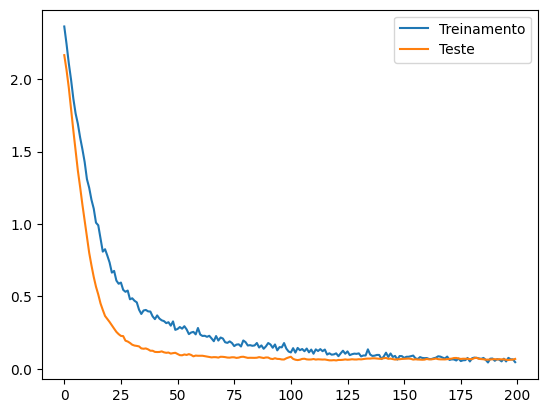

In [8]:
# Gráfico do histórico de treinamento
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='Treinamento')
pyplot.plot(history.history['val_loss'], label='Teste')
pyplot.legend()
pyplot.show()

### Funções auxiliares para exibir os resultados da rede neural

In [9]:
def printPrediction(X_data, y_data):
    print('\n# Predições')
    for i in range(len(y_data)):
        
    
        prediction = np.argmax(model.predict(X_data[i:i+1]), axis=-1)
        print("y={}, predição={}, equivalencia={}".format(y_data[i], prediction, y_data[i]==prediction[0]))

In [10]:
def printSound():
    y, sr = librosa.load('../data/recordings/train/0_christian_0.wav')
    plt.plot(y)
    plt.title('Sinal de voz')
    plt.xlabel('Tempo')
    plt.ylabel('Amplitude')

In [11]:
def printMfcc():
    y, sr = librosa.load('../data/recordings/train/0_christian_0.wav')
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)
    librosa.display.specshow(mfccs, x_axis='time')
    plt.colorbar()
    plt.tight_layout()
    plt.title('MFCC')
    plt.show

In [12]:
def printMel():
    y, sr = librosa.load('../data/recordings/train/0_christian_0.wav')
    mfcc = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
    fig, ax = plt.subplots()
    S_dB = librosa.power_to_db(mfcc, ref=np.max)
    img = librosa.display.specshow(S_dB, x_axis='time',
                            y_axis='mel', sr=sr,
                            fmax=8000, ax=ax)
    fig.colorbar(img, ax=ax, format='%+2.0f dB')
    ax.set(title='Espectrograma de frequencias de Mel')

In [13]:
from scipy import signal

def printPWRSpec():
    y, sr = librosa.load('../data/recordings/train/0_christian_0.wav')
    
    n_fft = 8192
    S = librosa.stft(y=y,n_fft=n_fft,win_length=n_fft,hop_length=n_fft,window='hann')
    F = librosa.fft_frequencies(sr=sr, n_fft=n_fft)
    Abs = np.abs(S)
    Abs_avg = np.mean(Abs, axis=1)
    Power_avg =(Abs_avg**2)
    
    plt.figure(figsize=(12, 8))
    plt.semilogx(F, Power_avg)
    plt.title('Espectrograma de força')
    plt.xlabel('Frequência (Hz)')
    plt.ylabel('Força')
    plt.show()
    

In [14]:
def printLogPower():
    y, sr = librosa.load('../data/recordings/train/0_christian_0.wav')
    D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)
    plt.figure(figsize=(12,8))
    librosa.display.specshow(D, y_axis='log', x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Espectrograma de força logarítmico')
    plt.xlabel('Tempo (s)')
    plt.show()
    

In [15]:
import numpy as np
from keras import backend as K
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

def report(X_data, y_data):
    # Matriz de confusão e Classificação
    Y_pred = np.argmax(model.predict(X_data), axis=-1)
    y_test_num = y_data.astype(np.int64)
    print('Matriz de confusão')
    conf_mt = confusion_matrix(y_test_num, Y_pred)
    print(conf_mt)
    plt.matshow(conf_mt)
    plt.show()
    
    print('\nClassificação')
    target_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
    print(classification_report(y_test_num, Y_pred, target_names=target_names))

### Apresentando a performance do modelo

In [16]:
print('\n## DADOS TESTADOS ##\n')
score = model.evaluate(X_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

# Predição
printPrediction(X_test[:], y_test[:])


## DADOS TESTADOS ##

2/2 [==============================] - 0s 3ms/step - loss: 0.0495 - accuracy: 1.0000
accuracy: 100.00%

# Predições
1/1 [==============================] - 0s 81ms/step
y=0, predição=[0], equivalencia=True
1/1 [==============================] - 0s 19ms/step
y=0, predição=[0], equivalencia=True
1/1 [==============================] - 0s 21ms/step
y=0, predição=[0], equivalencia=True
1/1 [==============================] - 0s 20ms/step
y=0, predição=[0], equivalencia=True
1/1 [==============================] - 0s 20ms/step
y=1, predição=[1], equivalencia=True
1/1 [==============================] - 0s 20ms/step
y=1, predição=[1], equivalencia=True
1/1 [==============================] - 0s 19ms/step
y=1, predição=[1], equivalencia=True
1/1 [==============================] - 0s 19ms/step
y=1, predição=[1], equivalencia=True
1/1 [==============================] - 0s 19ms/step
y=2, predição=[2], equivalencia=True
1/1 [==============================] - 0s 19ms/step
y=2, pre

Classifição dos dados testados

2/2 [==============================] - 0s 2ms/step
Matriz de confusão
[[4 0 0 0 0 0 0 0 0 0]
 [0 4 0 0 0 0 0 0 0 0]
 [0 0 4 0 0 0 0 0 0 0]
 [0 0 0 4 0 0 0 0 0 0]
 [0 0 0 0 4 0 0 0 0 0]
 [0 0 0 0 0 4 0 0 0 0]
 [0 0 0 0 0 0 4 0 0 0]
 [0 0 0 0 0 0 0 4 0 0]
 [0 0 0 0 0 0 0 0 4 0]
 [0 0 0 0 0 0 0 0 0 4]]


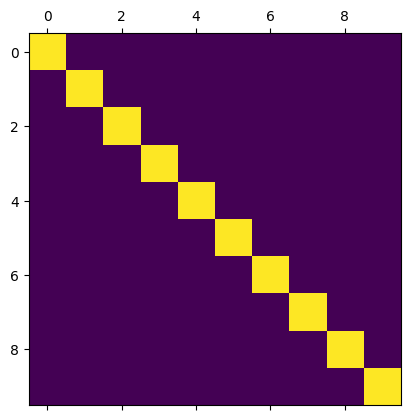


Classificação
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         4
           8       1.00      1.00      1.00         4
           9       1.00      1.00      1.00         4

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [17]:
print("Classifição dos dados testados\n")
report(X_test, y_test)
